In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.set_random_seed(777)

#Min Max Normalization
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [2]:
# train Parameters
seq_length = 7
data_dim = 6
hidden_dim = 10
output_dim = 1
learning_rate = 0.01

# bid ask low high volume
xy = np.genfromtxt('./data/bitcoin_ticker_eth_krw_hour.csv', delimiter=',', dtype=np.str)[:,[4,7,8,9,10,11]]
print(xy[0])

xy = xy[1:].astype(np.float)
xy = MinMaxScaler(xy[1:]) #normalize
x = xy[:]
y = xy[:,[0]]
print(x[:2])
print(y[:2])


['last' 'bid' 'ask' 'low' 'high' 'volume']
[[ 0.52493075  0.37053353  0.52463567  0.60770975  0.54615385  0.32157781]
 [ 0.59141274  0.41752325  0.59333796  0.60770975  0.52820513  0.32015694]]
[[ 0.52493075]
 [ 0.59141274]]


In [3]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next last price
    if i < 2 : print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 0.52493075  0.37053353  0.52463567  0.60770975  0.54615385  0.32157781]
 [ 0.59141274  0.41752325  0.59333796  0.60770975  0.52820513  0.32015694]
 [ 0.55817175  0.39402839  0.57321305  0.60770975  0.52820513  0.32937215]
 [ 0.60249307  0.39255996  0.59750173  0.60770975  0.52820513  0.33856945]
 [ 0.50069252  0.35340186  0.50104094  0.60770975  0.52820513  0.34429369]
 [ 0.51385042  0.35829662  0.50728661  0.60770975  0.52820513  0.35179124]
 [ 0.47368421  0.33431229  0.48507981  0.60770975  0.51623932  0.34650965]] -> [ 0.48268698]
[[ 0.59141274  0.41752325  0.59333796  0.60770975  0.52820513  0.32015694]
 [ 0.55817175  0.39402839  0.57321305  0.60770975  0.52820513  0.32937215]
 [ 0.60249307  0.39255996  0.59750173  0.60770975  0.52820513  0.33856945]
 [ 0.50069252  0.35340186  0.50104094  0.60770975  0.52820513  0.34429369]
 [ 0.51385042  0.35829662  0.50728661  0.60770975  0.52820513  0.35179124]
 [ 0.47368421  0.33431229  0.48507981  0.60770975  0.51623932  0.34650965]
 [ 0.48

In [4]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print(trainX[:2])
print(trainY[:2])

[[[ 0.52493075  0.37053353  0.52463567  0.60770975  0.54615385  0.32157781]
  [ 0.59141274  0.41752325  0.59333796  0.60770975  0.52820513  0.32015694]
  [ 0.55817175  0.39402839  0.57321305  0.60770975  0.52820513  0.32937215]
  [ 0.60249307  0.39255996  0.59750173  0.60770975  0.52820513  0.33856945]
  [ 0.50069252  0.35340186  0.50104094  0.60770975  0.52820513  0.34429369]
  [ 0.51385042  0.35829662  0.50728661  0.60770975  0.52820513  0.35179124]
  [ 0.47368421  0.33431229  0.48507981  0.60770975  0.51623932  0.34650965]]

 [[ 0.59141274  0.41752325  0.59333796  0.60770975  0.52820513  0.32015694]
  [ 0.55817175  0.39402839  0.57321305  0.60770975  0.52820513  0.32937215]
  [ 0.60249307  0.39255996  0.59750173  0.60770975  0.52820513  0.33856945]
  [ 0.50069252  0.35340186  0.50104094  0.60770975  0.52820513  0.34429369]
  [ 0.51385042  0.35829662  0.50728661  0.60770975  0.52820513  0.35179124]
  [ 0.47368421  0.33431229  0.48507981  0.60770975  0.51623932  0.34650965]
  [ 0.4826

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
# outputs[:, -1] : all batch of data_dim of last seq_length
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)


[step: 0] loss: 299.5288391113281
[step: 1] loss: 130.74591064453125
[step: 2] loss: 27.271921157836914
[step: 3] loss: 5.5228776931762695
[step: 4] loss: 45.09050369262695
[step: 5] loss: 72.47078704833984
[step: 6] loss: 67.3150634765625
[step: 7] loss: 45.66120910644531
[step: 8] loss: 23.32831382751465
[step: 9] loss: 8.79640007019043
[step: 10] loss: 3.8810875415802
[step: 11] loss: 6.26019811630249
[step: 12] loss: 12.134310722351074
[step: 13] loss: 18.09347152709961
[step: 14] loss: 21.959726333618164
[step: 15] loss: 22.877046585083008
[step: 16] loss: 21.03025245666504
[step: 17] loss: 17.259841918945312
[step: 18] loss: 12.697066307067871
[step: 19] loss: 8.45733642578125
[step: 20] loss: 5.401628494262695
[step: 21] loss: 3.975656270980835
[step: 22] loss: 4.147088527679443
[step: 23] loss: 5.4609785079956055
[step: 24] loss: 7.209936618804932
[step: 25] loss: 8.674379348754883
[step: 26] loss: 9.34865665435791
[step: 27] loss: 9.069374084472656
[step: 28] loss: 8.007187843

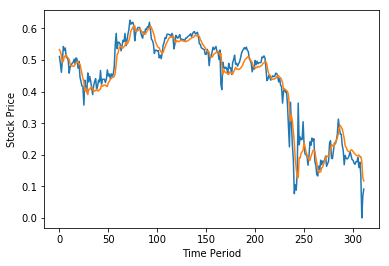

In [15]:
# train Parameters
iterations = 200

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
#         print(sess.run(outputs[:, -1], feed_dict={X: trainX, Y: trainY}))
        
    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    
    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()